In [40]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

True

In [41]:
# Connect database
conn = psycopg2.connect(
    host=os.getenv('DB_HOST'),
    database=os.getenv('DB_NAME'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    port=os.getenv('DB_PORT')
)

In [42]:
# Check what securities are available
securities = pd.read_sql("SELECT * FROM securities LIMIT 10", conn)
securities

/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_51161/3255664848.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  securities = pd.read_sql("SELECT * FROM securities LIMIT 10", conn)


,ticker,company_name,sector,industry,market_cap,first_trade_date,last_trade_date,is_active,created_at,updated_at
0,ALB,Albemarle Corporation,Materials,Specialty Chemicals,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
1,FCX,Freeport-McMoRan,Materials,Copper,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
2,ACGL,Arch Capital Group,Financials,Property & Casualty Insurance,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
3,ADM,Archer Daniels Midland,Consumer Staples,Agricultural Products & Services,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
4,ANET,Arista Networks,Information Technology,Communications Equipment,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
5,AJG,Arthur J. Gallagher & Co.,Financials,Insurance Brokers,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
6,T,AT&T,Communication Services,Integrated Telecommunication Services,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
7,ATO,Atmos Energy,Utilities,Gas Utilities,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
8,ADSK,Autodesk,Information Technology,Application Software,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012
9,ADP,Automatic Data Processing,Industrials,Human Resource & Employment Services,None,None,None,True,2026-02-07 20:27:21.576642,2026-02-10 11:24:31.943012


In [43]:
# Check price data
query = """
    SELECT ticker, COUNT(*) AS num_days, MIN(date) as start_date, MAX(date) as end_date
    FROM daily_prices
    GROUP BY ticker
    ORDER BY ticker
"""
price_summary = pd.read_sql(query, conn)
price_summary

/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_51161/266626155.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  price_summary = pd.read_sql(query, conn)


,ticker,num_days,start_date,end_date
0,A,1257,2021-02-08,2026-02-09
1,ABBV,1257,2021-02-08,2026-02-09
2,ABT,1257,2021-02-08,2026-02-09
3,ACN,1257,2021-02-08,2026-02-09
4,ADBE,1257,2021-02-08,2026-02-09
5,AES,1257,2021-02-08,2026-02-09
6,AFL,1257,2021-02-08,2026-02-09
7,AMD,1257,2021-02-08,2026-02-09
8,AOS,1257,2021-02-08,2026-02-09
9,MMM,1257,2021-02-08,2026-02-09


In [44]:
# Check price data summary
query = """
        SELECT ticker, COUNT(*) as num_days, MIN(date) as start_date, MAX(date) as end_date
        FROM daily_prices
        GROUP BY ticker
        ORDER BY ticker \
        """
price_summary = pd.read_sql(query, conn)
print(price_summary)

# Check AAPL prices
query = """
        SELECT * FROM daily_prices
        WHERE ticker = 'AMD'
        ORDER BY date DESC
            LIMIT 10 \
        """
amd_prices = pd.read_sql(query, conn)
print(amd_prices)


  ticker  num_days  start_date    end_date
0      A      1257  2021-02-08  2026-02-09
1   ABBV      1257  2021-02-08  2026-02-09
2    ABT      1257  2021-02-08  2026-02-09
3    ACN      1257  2021-02-08  2026-02-09
4   ADBE      1257  2021-02-08  2026-02-09
5    AES      1257  2021-02-08  2026-02-09
6    AFL      1257  2021-02-08  2026-02-09
7    AMD      1257  2021-02-08  2026-02-09
8    AOS      1257  2021-02-08  2026-02-09
9    MMM      1257  2021-02-08  2026-02-09
      id ticker        date    open    high     low   close     volume  \
0  21338    AMD  2026-02-09  206.90  217.60  204.15  216.00   38730100   
1   8792    AMD  2026-02-06  197.13  209.27  196.43  208.44   54504500   
2   8791    AMD  2026-02-05  201.86  204.04  190.72  192.50   62196400   
3   8790    AMD  2026-02-04  215.00  218.58  199.15  200.19  107173300   
4   8789    AMD  2026-02-03  251.55  252.65  237.04  242.11   53097100   
5   8788    AMD  2026-02-02  235.77  249.97  235.00  246.27   36308100   
6   8787 

/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_51161/1783554609.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  price_summary = pd.read_sql(query, conn)
/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_51161/1783554609.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  amd_prices = pd.read_sql(query, conn)


/var/folders/4d/xhxv9bj17jlcmhb9y9x4_rnh0000gn/T/ipykernel_51161/3172215076.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  amd = pd.read_sql(query, conn, index_col='date', parse_dates=['date'])


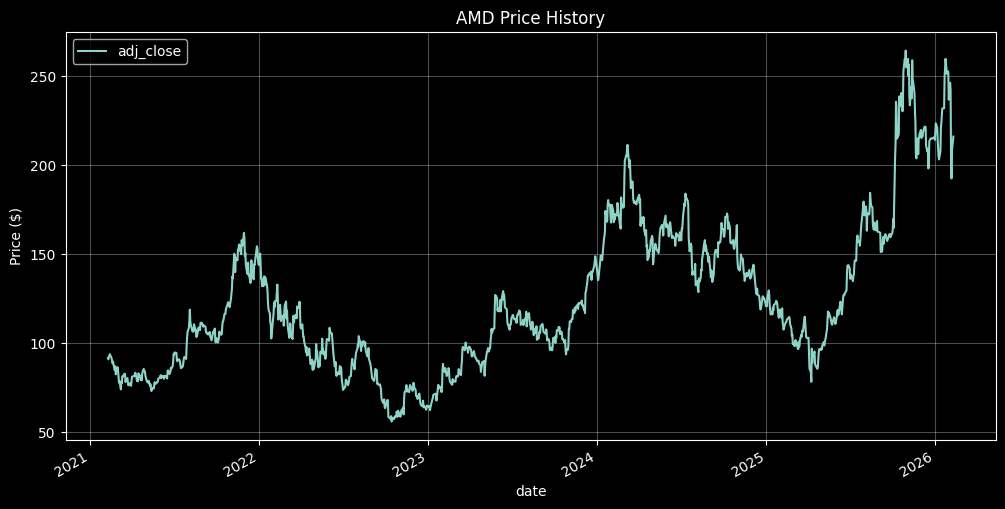

In [45]:
# Plot price history
import matplotlib.pyplot as plt

query = """
    SELECT date, adj_close FROM daily_prices
    WHERE ticker = 'AMD'
    ORDER BY date
"""
amd = pd.read_sql(query, conn, index_col='date', parse_dates=['date'])
amd.plot(figsize=(12, 6), title='AMD Price History')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()